In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/crop_recommendation.csv')


X = data.drop('label', axis=1).values

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
X_pca = pca.fit_transform(X_scaled)

# Output the explained variance ratio of the components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Create a DataFrame for the reduced dimensions
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the reduced dimensions with the target variable (if applicable)
# Replace 'target_column' with the column name of your target variable
df_final = pd.concat([df_pca, data['label']], axis=1)

# Output the final DataFrame
print(df_final.head())


Explained Variance Ratio: [0.27588831 0.18484431]
        PC1       PC2 label
0 -0.582869 -0.844586  rice
1 -0.474635 -0.784895  rice
2 -0.634068 -0.694522  rice
3 -1.047920 -1.087658  rice
4 -0.873258 -0.658673  rice


In [ ]:
import numpy as np
import pandas as pd

# Step 1: Standardize the dataset
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/crop_recommendation.csv')
X = data.drop('label', axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Step 3: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Step 5: Pick k eigenvalues and form a matrix of eigenvectors
k = 2  # Set the desired number of components
selected_eigenvectors = np.array([eigen_pairs[i][1] for i in range(k)])

# Step 6: Transform the original matrix
X_pca = X_scaled.dot(selected_eigenvectors.T)

# Output the explained variance ratio of the components
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio[:k])

# Create a DataFrame for the reduced dimensions
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the reduced dimensions with the target variable (if applicable)
df_final = pd.concat([df_pca, data['label']], axis=1)

# Output the final DataFrame
print(df_final.head())


Explained Variance Ratio: [0.27588831 0.02756874]
        PC1       PC2 label
0  0.582869  0.844586  rice
1  0.474635  0.784895  rice
2  0.634068  0.694522  rice
3  1.047920  1.087658  rice
4  0.873258  0.658673  rice


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace 'dataset.csv' with your own dataset file)
data = pd.read_csv('/content/crop_recommendation.csv')


# Separate the features from the target variable (if applicable)
# Replace 'target_column' with the column name of your target variable
X = data.drop('label', axis=1).values

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
X_pca = pca.fit_transform(X_scaled)

# Output the explained variance ratio of the components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Create a DataFrame for the reduced dimensions
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the reduced dimensions with the target variable (if applicable)
# Replace 'target_column' with the column name of your target variable
df_final = pd.concat([df_pca, data['label']], axis=1)



Explained Variance Ratio: [0.27588831 0.18484431]


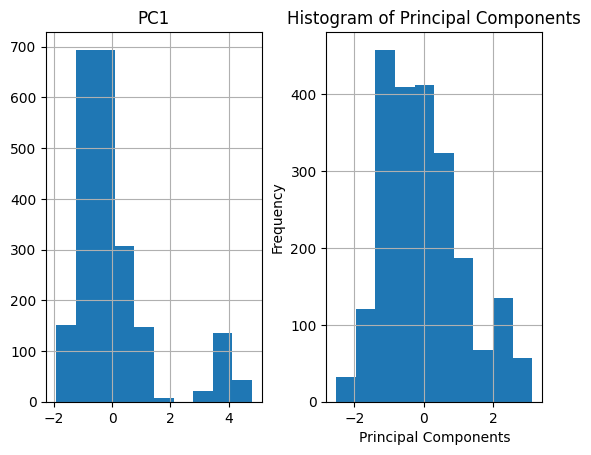

In [ ]:
# Histogram
df_final.hist(column=['PC1', 'PC2'])
plt.xlabel('Principal Components')
plt.ylabel('Frequency')
plt.title('Histogram of Principal Components')
plt.show()

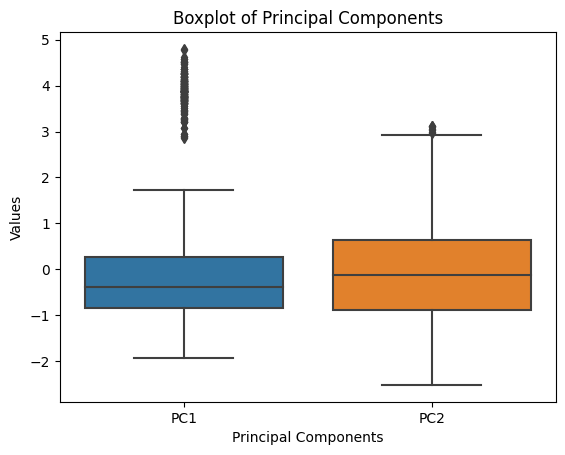

In [ ]:

# Boxplot
sns.boxplot(data=df_final[['PC1', 'PC2']])
plt.xlabel('Principal Components')
plt.ylabel('Values')
plt.title('Boxplot of Principal Components')
plt.show()



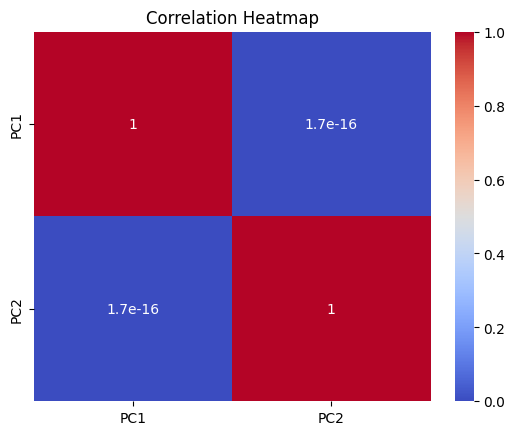

In [ ]:
# Correlation graph
corr = df_final.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
